In [1]:
import pandas as pd
data=pd.read_csv(r"H:\TOPMENTOR\2024\May-month\Projects\Files\KNN Assignment\iphone_purchase_records.csv")

In [2]:
data.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
df = pd.DataFrame(data)
print(f"Original Data:\n{df}\n")
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

Original Data:
     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]

One-Hot Encoded Data using Pandas:
     Age  Salary  Purchase Iphone  Gender_Male
0     19   19000                0         True
1     35   20000                0         True
2     26   43000                0        False
3     27   57000                0        False
4     19   76000                0         True
..   ...     ...              ...          ...
395   46   41000                1        False
396   51   23000                1         Tru

In [12]:
# Use the .replace() method to map True/False to 1/0
df_pandas_encoded = df_pandas_encoded.replace({True: 1, False: 0})

# Print the updated DataFrame 'df_pandas_encoded' where Boolean values 
# are now represented as integers (1/0)
print(df_pandas_encoded)

     Age  Salary  Purchase Iphone  Gender_Male
0     19   19000                0            1
1     35   20000                0            1
2     26   43000                0            0
3     27   57000                0            0
4     19   76000                0            1
..   ...     ...              ...          ...
395   46   41000                1            0
396   51   23000                1            1
397   50   20000                1            0
398   36   33000                0            1
399   49   36000                1            0

[400 rows x 4 columns]


In [20]:
X = df_pandas_encoded[['Gender_Male','Age','Salary']]
y = df_pandas_encoded['Purchase Iphone']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(X_test.shape)
print(y_test.shape)

(80, 3)
(80,)


In [23]:
### Model building
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)  ## k=3 chosen based on error method
model_train=model.fit(X_train,y_train)
print("Model training completed")

Model training completed


In [24]:
from sklearn.metrics import r2_score,mean_squared_error
pred=model_train.predict(X_test)
r2_score(y_test,pred)

0.134550371872887

In [33]:
## How to choose value of k ; it will be based on error 
error = []
k= []
for i in range(1,10):
    print("when k =", i)
    model=KNeighborsClassifier(n_neighbors=i)
    model_train=model.fit(X_train,y_train)
    print("Model training completed")
    err=(1-(model_train.score(X_train,y_train)))
    error.append(err)
    k.append(i)

when k = 1
Model training completed
when k = 2
Model training completed
when k = 3
Model training completed
when k = 4
Model training completed
when k = 5
Model training completed
when k = 6
Model training completed
when k = 7
Model training completed
when k = 8
Model training completed
when k = 9
Model training completed


In [35]:
error

[0.0,
 0.09687500000000004,
 0.09687500000000004,
 0.13437500000000002,
 0.125,
 0.14687499999999998,
 0.16249999999999998,
 0.16562500000000002,
 0.15937500000000004]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

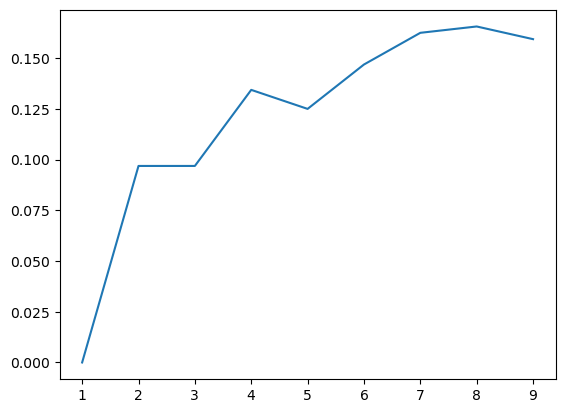

In [37]:
plt.plot(k,error)